In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # visualizing data

In [3]:
##reading the data 
data = pd.read_csv('BlackFriday.csv')

In [4]:
#show data
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.fillna(value=0,inplace=True)

In [6]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


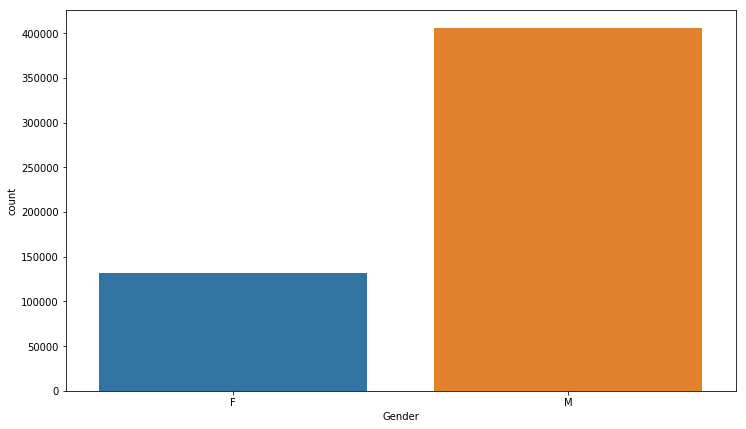

In [8]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Gender'])

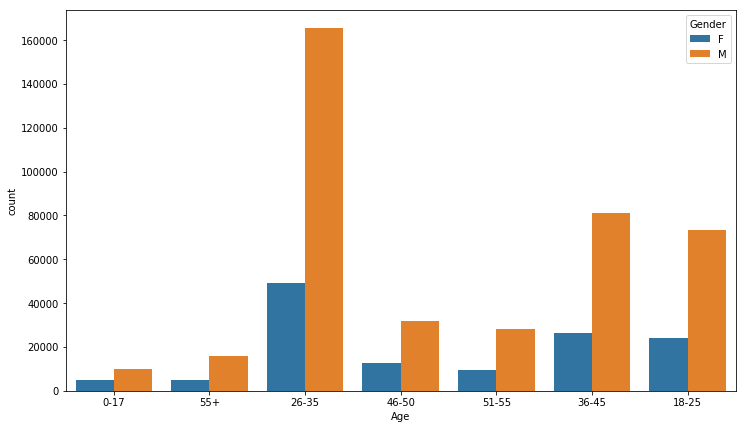

In [11]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Age'],hue=data['Gender'])

In [14]:
data['combined_G_M'] = data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)

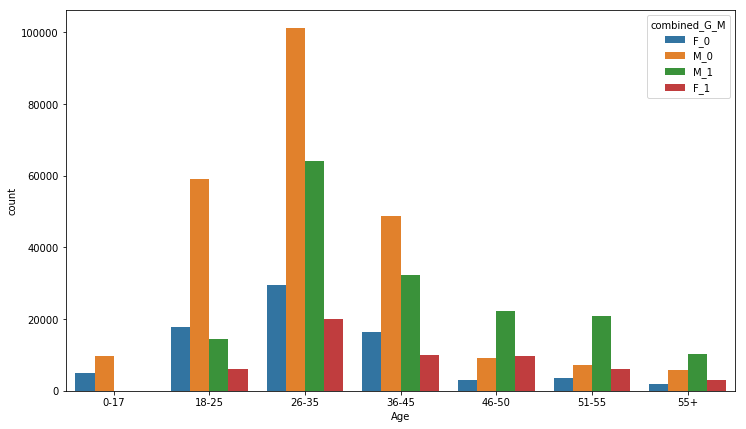

In [18]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['Age'],hue=data['combined_G_M'], order=sorted(data.Age.unique()))

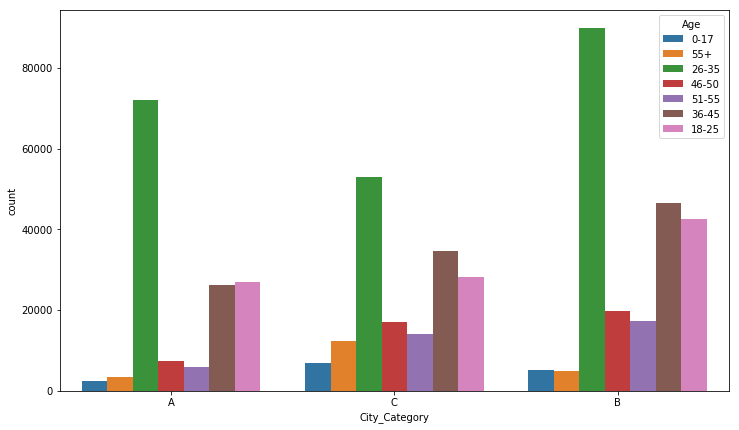

In [26]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(data['City_Category'],hue=data['Age'])

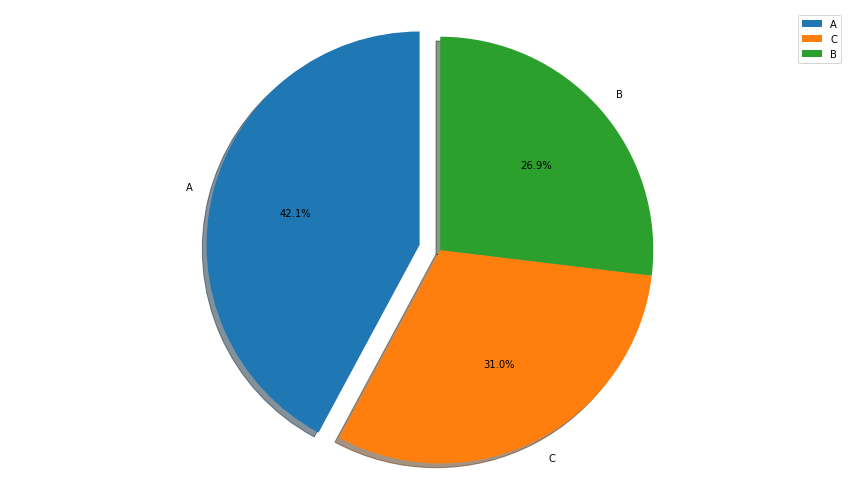

In [27]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data['City_Category'].value_counts(),explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

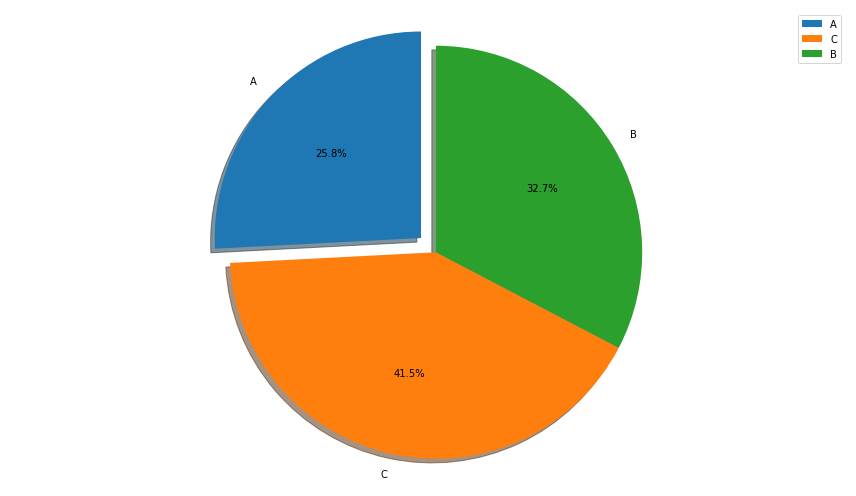

In [29]:
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(data.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

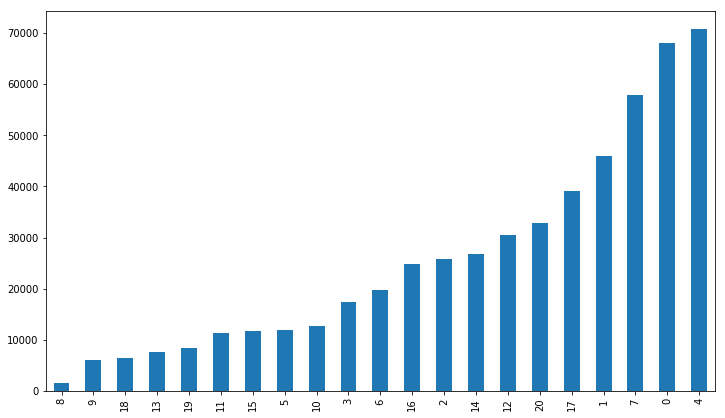

In [35]:
fig1, ax1 = plt.subplots(figsize=(12,7))
data['Occupation'].value_counts().sort_values().plot('bar')

In [ ]:
sns.countplot(data['Occupation'],hue=data['Purchase']).plot('bar')